In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
y_symbols=['AAPL']
from datetime import datetime
#%matplotlib inline
startdate=datetime(2015,1,1)
enddate=datetime(2023,12,30)
data=pdr.get_data_yahoo(y_symbols,start=startdate,end=enddate)

[*********************100%***********************]  1 of 1 completed


In [2]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.531765,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.840660,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.842909,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.177242,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.106188,237458000
...,...,...,...,...,...,...
2023-07-31,196.059998,196.490005,195.259995,196.449997,196.449997,38824100
2023-08-01,196.240005,196.729996,195.279999,195.610001,195.610001,35175100
2023-08-02,195.039993,195.179993,191.850006,192.580002,192.580002,50389300


In [3]:
data=data.reset_index()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.531765,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.840660,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.842909,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.177242,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.106188,237458000


In [4]:
data=data.drop(['Date','Adj Close'],axis=1)
data.head()

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000


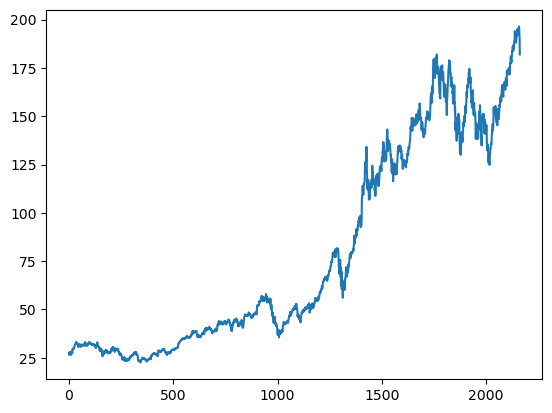

In [5]:
plt.plot(data.Close)

In [6]:
ma100=data.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2157    174.6826
2158    175.1100
2159    175.5299
2160    175.9566
2161    176.2718
Name: Close, Length: 2162, dtype: float64

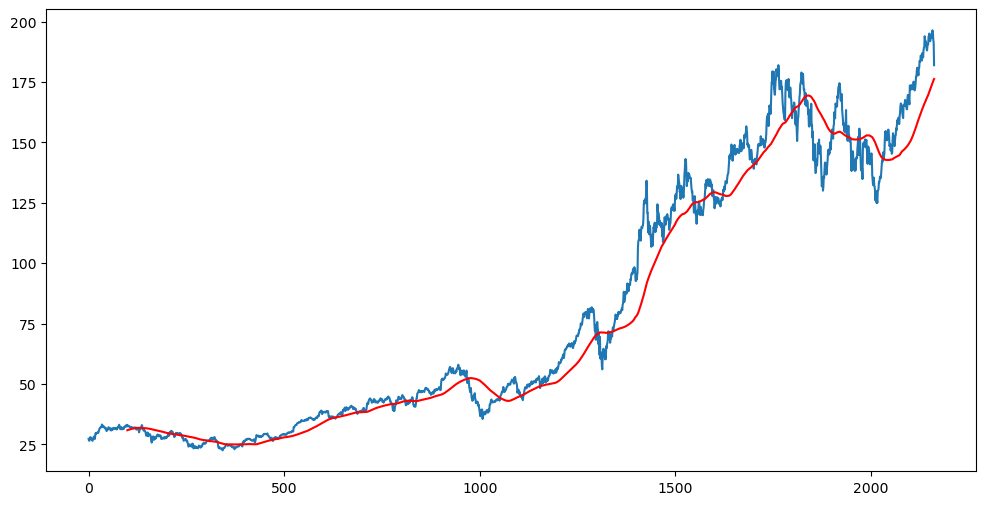

In [7]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100,'r')

In [8]:
ma200=data.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2157    159.01725
2158    159.30360
2159    159.55155
2160    159.81550
2161    160.01340
Name: Close, Length: 2162, dtype: float64

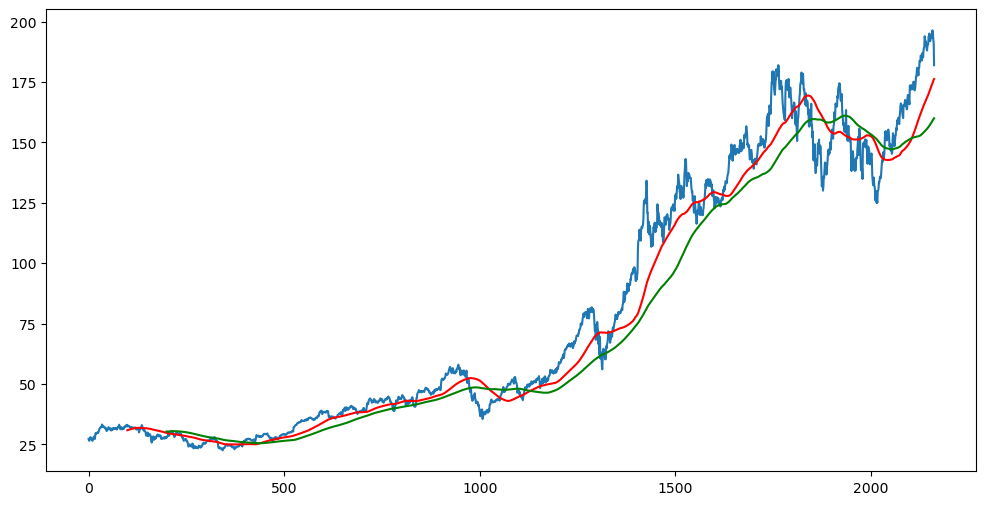

In [9]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [10]:
data_train=pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_test=pd.DataFrame(data['Close'][int(len(data)*0.70):int(len(data))])

In [11]:
print(data_train.shape)
print(data_test.shape)

(1513, 1)
(649, 1)


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [13]:
data_train_array=scaler.fit_transform(data_train)
data_train_array

array([[0.04160643],
       [0.03485825],
       [0.03488017],
       ...,
       [0.96494457],
       [0.93619913],
       [0.95022122]])

In [14]:
X_train=[]
Y_train=[]
for i in range(100,data_train_array.shape[0]):
    X_train.append(data_train_array[i-100:i])
    Y_train.append(data_train_array[i,0])
X_train,Y_train=np.array(X_train),np.array(Y_train)

In [15]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [17]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [19]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,Y_train,epochs=50)

Epoch 1/50
45/45 [==============================] - 13s 155ms/step - loss: 0.0308
Epoch 2/50
45/45 [==============================] - 7s 162ms/step - loss: 0.0064
Epoch 3/50
45/45 [==============================] - 7s 155ms/step - loss: 0.0050
Epoch 4/50
45/45 [==============================] - 7s 162ms/step - loss: 0.0049
Epoch 5/50
45/45 [==============================] - 7s 162ms/step - loss: 0.0044
Epoch 6/50
45/45 [==============================] - 8s 168ms/step - loss: 0.0047
Epoch 7/50
45/45 [==============================] - 8s 167ms/step - loss: 0.0034
Epoch 8/50
45/45 [==============================] - 8s 177ms/step - loss: 0.0039
Epoch 9/50
45/45 [==============================] - 8s 175ms/step - loss: 0.0034
Epoch 10/50
45/45 [==============================] - 8s 177ms/step - loss: 0.0031
Epoch 11/50
45/45 [==============================] - 8s 176ms/step - loss: 0.0031
Epoch 12/50
45/45 [==============================] - 8s 179ms/step - loss: 0.0036
Epoch 13/50
45/45 [=====

In [20]:
model.save('keras_model.hS')

INFO:tensorflow:Assets written to: keras_model.hS\assets


In [21]:
data_test.head()

,Close
1513,126.599998
1514,130.919998
1515,132.050003
1516,128.979996
1517,128.800003


In [22]:
data_train.tail(100)

,Close
1413,115.010002
1414,114.907501
1415,114.607498
1416,115.562500
1417,115.707497
...,...
1508,134.869995
1509,133.720001
1510,132.690002
1511,129.410004


In [23]:
past_100_days=data_train.tail(100)

In [24]:
final_df = past_100_days.append(data_test,ignore_index=True)

C:\Users\91990\AppData\Local\Temp\ipykernel_4992\1652558580.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_test,ignore_index=True)


In [25]:
final_df.head()

,Close
0,115.010002
1,114.907501
2,114.607498
3,115.562500
4,115.707497


In [26]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.09117292],
       [0.09002907],
       [0.08668119],
       [0.09733851],
       [0.09895659],
       [0.12760858],
       [0.19562556],
       [0.21222522],
       [0.20070305],
       [0.21964627],
       [0.20276761],
       [0.20050783],
       [0.24774017],
       [0.30509983],
       [0.27407652],
       [0.15667895],
       [0.15757173],
       [0.06673366],
       [0.11695127],
       [0.07421048],
       [0.0575829 ],
       [0.09507872],
       [0.09708743],
       [0.0590336 ],
       [0.03905814],
       [0.        ],
       [0.03615674],
       [0.05546257],
       [0.00312472],
       [0.01540012],
       [0.06070754],
       [0.09061492],
       [0.08090615],
       [0.10010045],
       [0.11103676],
       [0.06896552],
       [0.10780051],
       [0.07052792],
       [0.09195408],
       [0.09072654],
       [0.11304547],
       [0.19596033],
       [0.15913405],
       [0.16013844],
       [0.15478186],
       [0.13592233],
       [0.10199762],
       [0.119

In [27]:
input_data.shape

(749, 1)

In [28]:
X_test=[]
Y_test=[]

for i in range(100,input_data.shape[0]):
    X_test.append(input_data[i-100:i])
    Y_test.append(input_data[i,0])

In [29]:
X_test,Y_test=np.array(X_test),np.array(Y_test)
print(X_test.shape)
print(Y_test.shape)

(649, 100, 1)
(649,)


In [30]:
y_predicted= model.predict(X_test)

21/21 [==============================] - 2s 42ms/step


In [31]:
y_predicted.shape

(649, 1)

In [32]:
Y_test

array([0.22051113, 0.26872003, 0.28133028, 0.24707063, 0.24506201,
       0.26838526, 0.24628956, 0.22653725, 0.23423731, 0.28110704,
       0.33511883, 0.3596698 , 0.40263365, 0.40531199, 0.3930365 ,
       0.33757393, 0.28032597, 0.30465353, 0.31413915, 0.30242167,
       0.3409218 , 0.33389128, 0.33556531, 0.32552168, 0.31860287,
       0.31570147, 0.31837963, 0.29405207, 0.26782725, 0.25521717,
       0.25700255, 0.21381546, 0.21225314, 0.20656179, 0.1579065 ,
       0.1609196 , 0.23379092, 0.20399516, 0.16984713, 0.14830935,
       0.16270507, 0.10623819, 0.15902243, 0.1466355 , 0.1687312 ,
       0.15835289, 0.19138491, 0.20901689, 0.19997774, 0.15277315,
       0.14674703, 0.18468924, 0.17520371, 0.14786296, 0.1534427 ,
       0.1603616 , 0.1623703 , 0.14574272, 0.17085152, 0.18033706,
       0.21269953, 0.21615894, 0.23501847, 0.26247075, 0.29193174,
       0.27229114, 0.3078897 , 0.28110704, 0.30867095, 0.30487677,
       0.31246512, 0.29315929, 0.29751148, 0.28010273, 0.30666

In [34]:
y_predicted

array([[0.27383995],
       [0.27907854],
       [0.2811328 ],
       [0.2806747 ],
       [0.2781936 ],
       [0.27424917],
       [0.26943955],
       [0.26416987],
       [0.258582  ],
       [0.25281465],
       [0.24769676],
       [0.24469966],
       [0.24500728],
       [0.24908504],
       [0.25737286],
       [0.26970953],
       [0.28461048],
       [0.29932272],
       [0.31176063],
       [0.32094365],
       [0.32655156],
       [0.3291132 ],
       [0.32942885],
       [0.32833862],
       [0.32643718],
       [0.324062  ],
       [0.32138714],
       [0.31857717],
       [0.31545258],
       [0.3115339 ],
       [0.30639786],
       [0.30003136],
       [0.2924706 ],
       [0.28376168],
       [0.27383476],
       [0.26269326],
       [0.2509867 ],
       [0.23977989],
       [0.22965033],
       [0.22098233],
       [0.21367425],
       [0.20770352],
       [0.20279926],
       [0.19857726],
       [0.1948441 ],
       [0.19154042],
       [0.18865743],
       [0.186

In [35]:
scaler.scale_

array([0.01115947])

In [39]:
scale_factor=1/0.00222643
y_predicted=y_predicted*scale_factor
Y_test=Y_test*scale_factor

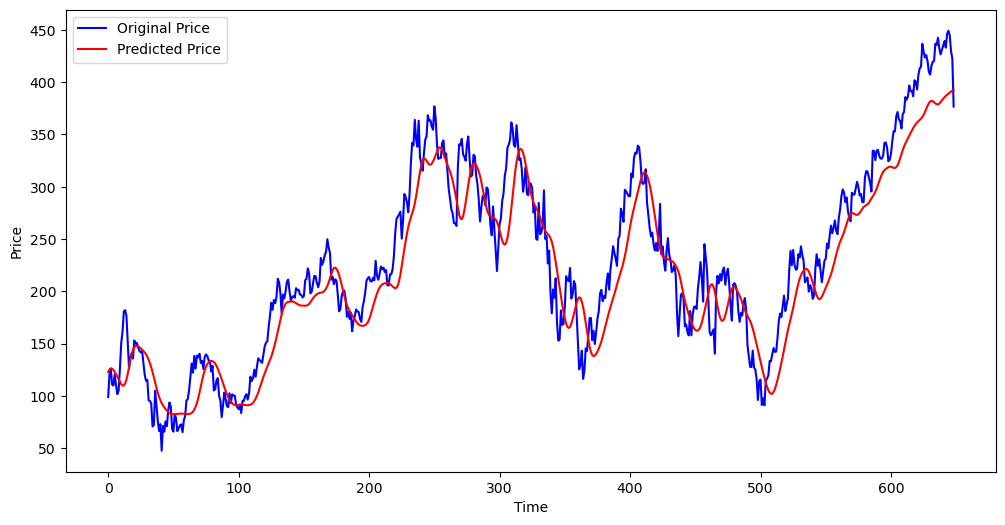

In [40]:
plt.figure(figsize=(12,6))
plt.plot(Y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()